### Enhanced Rock Classification



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import recall_score
import warnings
from sklearn.metrics import confusion_matrix

In [ ]:
warnings.filterwarnings(action='ignore')

##### Part -1 Loading the data and some stat. analysis 


## Importing the dataset

- For Getting the Labels of Rock

In [8]:
rock=pd.read_excel("aggregateRockData-1.xlsx",header=None)
rock.shape

(540, 14)

In [9]:
rock

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,716,3,28,18,4,1,0,81,57,25,0.012195,0.000000,0.987805,0.695122
536,717,3,29,17,4,2,44,36,40,42,0.024390,0.536585,0.439024,0.487805
537,718,3,29,18,4,25,9,48,27,55,0.304878,0.109756,0.585366,0.329268
538,719,3,30,17,4,16,46,20,23,59,0.195122,0.560976,0.243902,0.280488


- For Getting the Features on which the label depends

In [2]:
rockfeatures = pd.read_csv('norm540.txt', sep='\t',header=None)
rockfeatures


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,...,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,2,1,2,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,3,1,3,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,...,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,4,1,4,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,5,1,5,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,...,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,716,28,18,-0.037053,-0.159688,-0.435401,-0.410886,-1.126751,-0.436004,-0.405184,...,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,7.986072,-0.685937,-0.541391,-0.409247,5.216791
536,717,29,17,-0.584681,-0.407623,-0.957168,-0.493780,0.066717,-0.436004,-0.405184,...,-0.069195,-0.013842,-0.540653,-0.846887,-0.227922,-0.225045,1.592561,-0.541391,3.054169,-0.310419
537,718,29,18,-0.559789,0.881638,0.066299,-1.053311,-1.088458,-0.436004,-0.405184,...,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,5.010309,-0.541391,-0.409247,-0.310419
538,719,30,17,-0.753949,-0.407623,-0.029024,-0.701014,0.366680,-0.436004,-0.405184,...,1.770626,0.484475,-0.353270,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419


In [3]:
rockfeatures=rockfeatures.iloc[:,3:]

In [4]:
rockfeatures

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.037053,-0.159688,-0.435401,-0.410886,-1.126751,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,7.986072,-0.685937,-0.541391,-0.409247,5.216791
536,-0.584681,-0.407623,-0.957168,-0.493780,0.066717,-0.436004,-0.405184,4.102756,0.045922,-0.069195,-0.013842,-0.540653,-0.846887,-0.227922,-0.225045,1.592561,-0.541391,3.054169,-0.310419
537,-0.559789,0.881638,0.066299,-1.053311,-1.088458,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,5.010309,-0.541391,-0.409247,-0.310419
538,-0.753949,-0.407623,-0.029024,-0.701014,0.366680,-0.436004,-0.405184,-0.352386,-0.260224,1.770626,0.484475,-0.353270,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419


- No null values observed in our features for predicting the labels

In [5]:
rockfeatures.isna().sum()

3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

- We are classifying the data for the outcome of the labels of the rock. If the label is (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary)

##### To see the statistical summary of our dataset

In [6]:
rockfeatures.describe()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481482e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555557e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01
min,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
25%,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
50%,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
75%,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01
max,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00


- Getting Labels from the rock dataset and defining it as y variable

In [10]:
y=rock.iloc[:,1]


In [23]:
x_with_y = pd.DataFrame({'y': y, **x.to_dict()})

In [26]:
x_with_y.corr()

,y,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
y,1.000000,-0.305296,-0.301462,-0.104748,-0.164925,0.103781,-0.123388,0.009450,0.086923,-0.016680,0.262855,0.130094,0.007679,-0.242921,0.253550,0.121163,0.132240,-0.068022,0.061825,0.258386
3,-0.305296,1.000000,0.017601,0.255830,0.534070,-0.505542,0.645724,0.653319,-0.117642,-0.026782,-0.490498,-0.189307,-0.310966,0.373241,-0.163897,0.046817,-0.226060,0.819815,-0.108380,-0.086319
4,-0.301462,0.017601,1.000000,-0.026329,-0.199425,-0.248047,-0.026176,-0.026623,-0.112504,-0.086442,-0.210501,-0.155518,-0.154314,-0.098999,-0.082330,-0.044729,0.283791,-0.035854,-0.132162,-0.087471
5,-0.104748,0.255830,-0.026329,1.000000,0.126113,-0.189701,0.064291,0.186064,-0.061815,0.006080,-0.050614,-0.033938,-0.131127,0.089565,-0.168250,0.011505,-0.072024,0.169734,-0.042696,-0.109629
6,-0.164925,0.534070,-0.199425,0.126113,1.000000,0.055266,0.450381,0.321181,-0.081682,0.006070,-0.334001,-0.099182,0.180904,0.141837,0.128090,0.237183,-0.442259,0.498259,-0.055575,0.243675
7,0.103781,-0.505542,-0.248047,-0.189701,0.055266,1.000000,-0.210173,-0.260734,-0.019918,0.058211,0.275226,0.058838,0.641196,-0.240125,0.075173,-0.088640,-0.196296,-0.293316,0.018864,-0.002322
8,-0.123388,0.645724,-0.026176,0.064291,0.450381,-0.210173,1.000000,0.260913,-0.137379,-0.103715,-0.229081,-0.130497,-0.152724,0.055986,-0.086229,-0.027110,-0.164748,0.783714,-0.161878,-0.078127
9,0.009450,0.653319,-0.026623,0.186064,0.321181,-0.260734,0.260913,1.000000,-0.125969,-0.084503,-0.236336,-0.143923,-0.136893,0.009402,-0.090216,-0.045775,-0.133824,0.794627,-0.143357,-0.093649
10,0.086923,-0.117642,-0.112504,-0.061815,-0.081682,-0.019918,-0.137379,-0.125969,1.000000,0.178444,0.006392,0.055417,-0.102114,-0.140431,-0.014729,-0.071865,0.106271,-0.168211,0.805348,-0.055964
11,-0.016680,-0.026782,-0.086442,0.006080,0.006070,0.058211,-0.103715,-0.084503,0.178444,1.000000,-0.125805,0.043942,-0.069111,-0.116719,-0.055039,-0.057039,-0.076266,-0.120035,0.715588,-0.076533


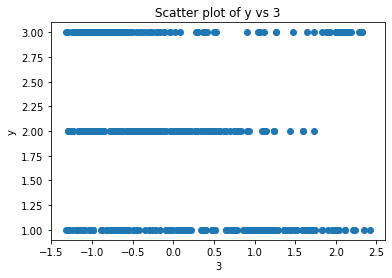

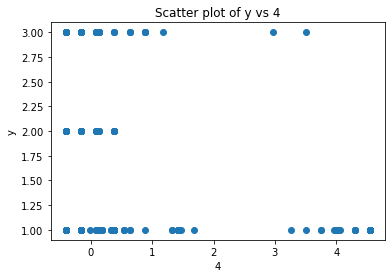

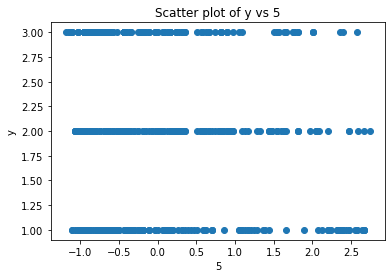

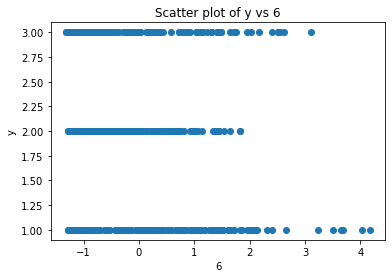

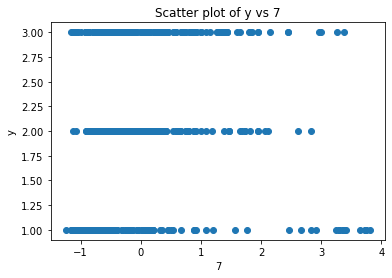

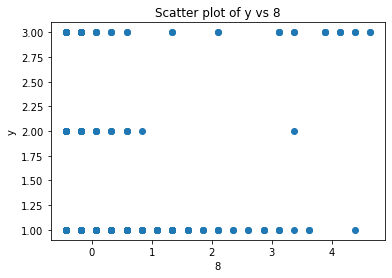

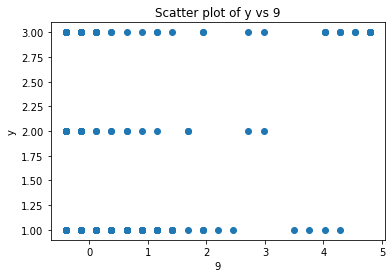

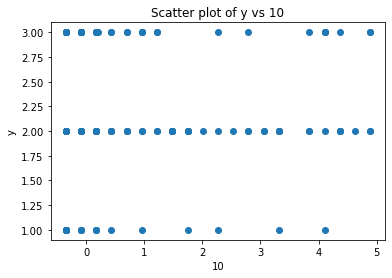

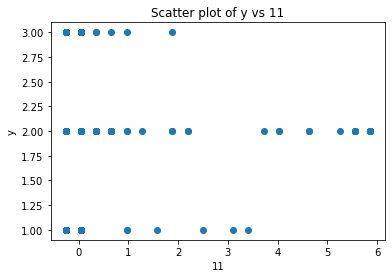

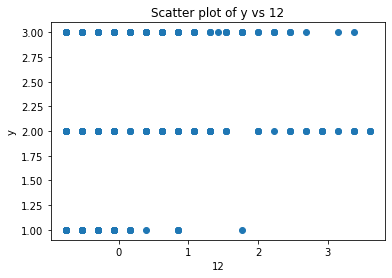

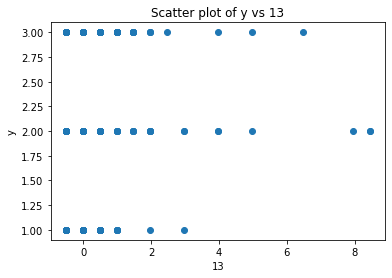

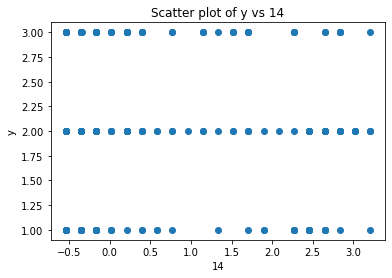

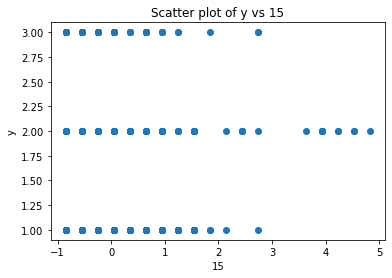

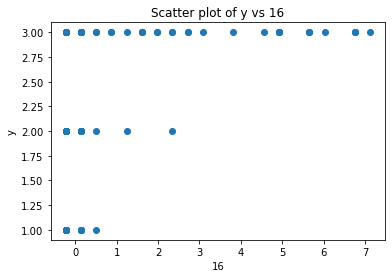

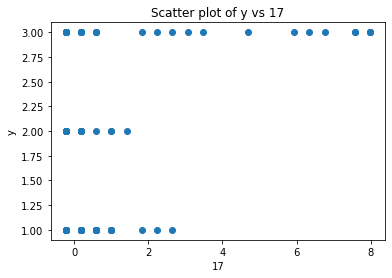

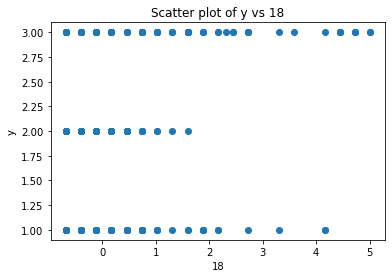

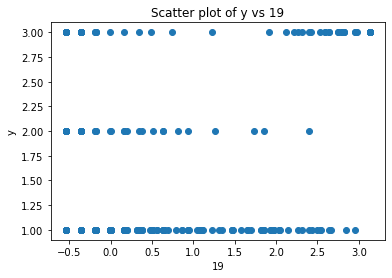

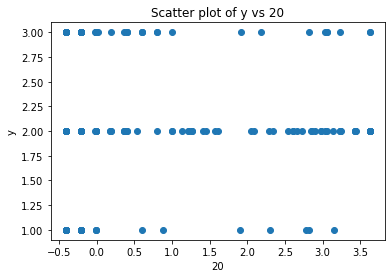

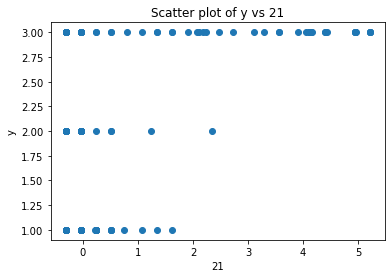

In [25]:
y = x_with_y['y']

# Get the list of column names excluding 'y'
x_columns = list(x_with_y.columns[1:])  # Exclude the 'y' column

# Iterate through each column and create scatter plots
for column in x_columns:
    # Extract the current column
    x = x_with_y[column]
    
    # Create a scatter plot
    plt.scatter(x, y)
    plt.xlabel(column)  # Set the x-axis label to the current column name
    plt.ylabel('y')  # Set the y-axis label to 'y'
    plt.title(f'Scatter plot of y vs {column}')
    plt.show()

In [ ]:
pcc

In [11]:
y.value_counts()

1    180
2    180
3    180
Name: 1, dtype: int64

In [21]:
x=rockfeatures

In [22]:
x

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.037053,-0.159688,-0.435401,-0.410886,-1.126751,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,7.986072,-0.685937,-0.541391,-0.409247,5.216791
536,-0.584681,-0.407623,-0.957168,-0.493780,0.066717,-0.436004,-0.405184,4.102756,0.045922,-0.069195,-0.013842,-0.540653,-0.846887,-0.227922,-0.225045,1.592561,-0.541391,3.054169,-0.310419
537,-0.559789,0.881638,0.066299,-1.053311,-1.088458,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,5.010309,-0.541391,-0.409247,-0.310419
538,-0.753949,-0.407623,-0.029024,-0.701014,0.366680,-0.436004,-0.405184,-0.352386,-0.260224,1.770626,0.484475,-0.353270,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419


In [16]:
import seaborn as sns

In [20]:
x.corr()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
3,1.000000,0.017601,0.255830,0.534070,-0.505542,0.645724,0.653319,-0.117642,-0.026782,-0.490498,-0.189307,-0.310966,0.373241,-0.163897,0.046817,-0.226060,0.819815,-0.108380,-0.086319
4,0.017601,1.000000,-0.026329,-0.199425,-0.248047,-0.026176,-0.026623,-0.112504,-0.086442,-0.210501,-0.155518,-0.154314,-0.098999,-0.082330,-0.044729,0.283791,-0.035854,-0.132162,-0.087471
5,0.255830,-0.026329,1.000000,0.126113,-0.189701,0.064291,0.186064,-0.061815,0.006080,-0.050614,-0.033938,-0.131127,0.089565,-0.168250,0.011505,-0.072024,0.169734,-0.042696,-0.109629
6,0.534070,-0.199425,0.126113,1.000000,0.055266,0.450381,0.321181,-0.081682,0.006070,-0.334001,-0.099182,0.180904,0.141837,0.128090,0.237183,-0.442259,0.498259,-0.055575,0.243675
7,-0.505542,-0.248047,-0.189701,0.055266,1.000000,-0.210173,-0.260734,-0.019918,0.058211,0.275226,0.058838,0.641196,-0.240125,0.075173,-0.088640,-0.196296,-0.293316,0.018864,-0.002322
8,0.645724,-0.026176,0.064291,0.450381,-0.210173,1.000000,0.260913,-0.137379,-0.103715,-0.229081,-0.130497,-0.152724,0.055986,-0.086229,-0.027110,-0.164748,0.783714,-0.161878,-0.078127
9,0.653319,-0.026623,0.186064,0.321181,-0.260734,0.260913,1.000000,-0.125969,-0.084503,-0.236336,-0.143923,-0.136893,0.009402,-0.090216,-0.045775,-0.133824,0.794627,-0.143357,-0.093649
10,-0.117642,-0.112504,-0.061815,-0.081682,-0.019918,-0.137379,-0.125969,1.000000,0.178444,0.006392,0.055417,-0.102114,-0.140431,-0.014729,-0.071865,0.106271,-0.168211,0.805348,-0.055964
11,-0.026782,-0.086442,0.006080,0.006070,0.058211,-0.103715,-0.084503,0.178444,1.000000,-0.125805,0.043942,-0.069111,-0.116719,-0.055039,-0.057039,-0.076266,-0.120035,0.715588,-0.076533
12,-0.490498,-0.210501,-0.050614,-0.334001,0.275226,-0.229081,-0.236336,0.006392,-0.125805,1.000000,0.074632,0.179334,-0.301661,-0.095277,-0.136120,-0.051544,-0.297611,-0.062761,-0.156928


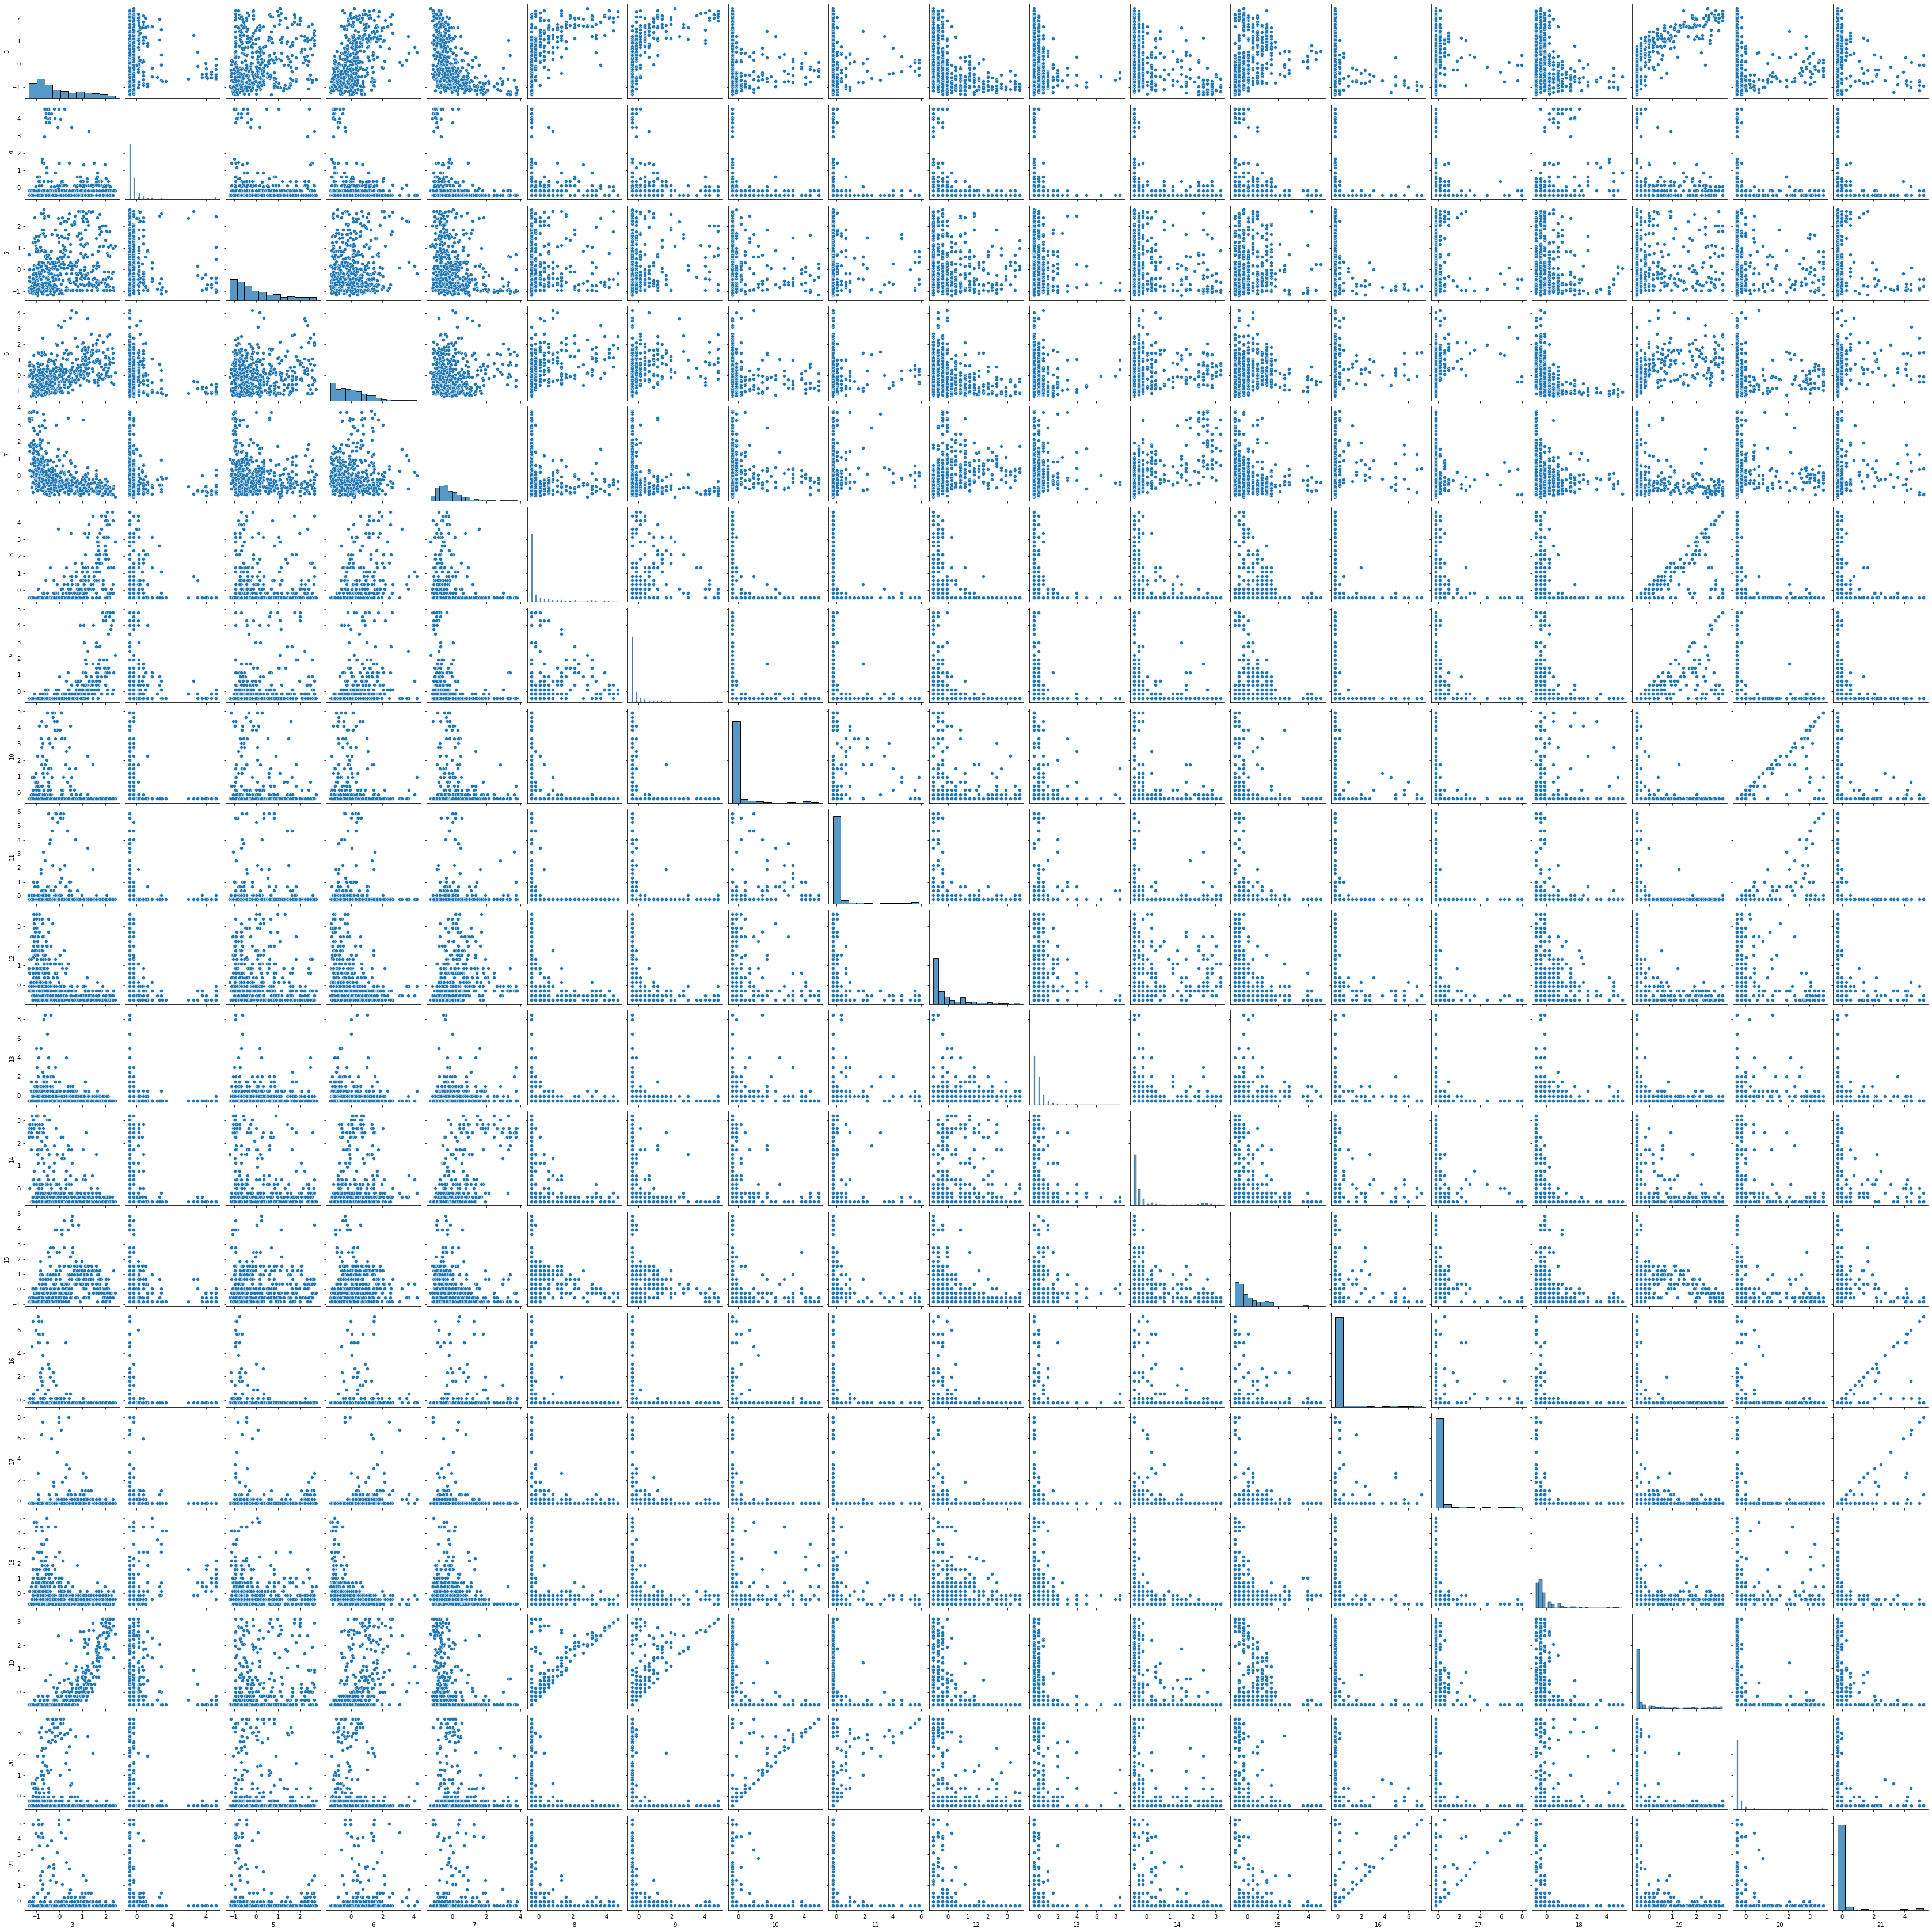

In [19]:
sns.pairplot(x)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.columns

Int64Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21],
           dtype='int64')

### Part 2

#### Splitting the dataset into validation and train sets

In [23]:
xtr,xval,ytr,yval=train_test_split(x_train,y_train,test_size=0.2)

####  Logistic  Regression(Multinomial Classifier) -Manually trying different hyperparameters

- Here I have used different parameters of c for testing different hyperparameters, to check for val and training scores

In [189]:
c=[0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in c:
    softreg = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000, C=0.1)
    softreg.fit(xtr, ytr)
    ypredval=softreg.predict(xval)
    ypredtrain=softreg.predict(xtr)
    print("For c=",i)
    print("Train_Score",softreg.score(xtr,ytr),"Val_Score",softreg.score(xval,yval))

For c= 0.0001
Train_Score 0.3826086956521739 Val_Score 0.28735632183908044
For c= 0.001
Train_Score 0.6405797101449275 Val_Score 0.6091954022988506
For c= 0.01
Train_Score 0.7014492753623188 Val_Score 0.6896551724137931
For c= 0.1
Train_Score 0.744927536231884 Val_Score 0.7126436781609196
For c= 1
Train_Score 0.736231884057971 Val_Score 0.7126436781609196
For c= 10
Train_Score 0.7420289855072464 Val_Score 0.6896551724137931
For c= 100
Train_Score 0.744927536231884 Val_Score 0.6781609195402298
For c= 1000
Train_Score 0.744927536231884 Val_Score 0.6666666666666666


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Define the values of C to be used in the grid search
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create the parameter grid
param_grid = {'C': c_values}

# Instantiate Logistic Regression model
softreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=softreg, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(xtr, ytr)  # Replace xtr and ytr with your training data

# Access the results
results_df = pd.DataFrame(grid_search.cv_results_)
print("Validation scores for all parameter combinations:")
print(results_df[['param_C', 'mean_test_score']])


Validation scores for all parameter combinations:
  param_C  mean_test_score
0  0.0001         0.362319
1   0.001         0.576812
2    0.01         0.657971
3     0.1         0.710145
4       1         0.715942
5      10         0.701449
6     100         0.692754
7    1000         0.698551


####                                             Results for Softmax Regression
| Value of C| Maximum Iterations | Training Score | Validation Score|
|-----------|--------------------|--------------- |----------------|
    0.0001  |       1000         |0.38            |0.28
    0.001   |       1000         |0.64            |0.60
    0.01    |       1000         |0.70            |0.68
    0.1     |       1000         |0.74            |0.71
    1       |       1000         |0.74            |0.68
    10      |       1000         |0.75            |0.68
    100     |       1000         |0.75            |0.67

- In the above table the training score and validation score are relatively close.However, when the regularization parameter is 0.1, the model does  perform well on the training as well as the validation data.
- The highest validation score is achieved for c=0.1, with a validation score of  0.78.This suggests that these values of C are providing a good balance between fitting the training data and generalizing to unseen data.

### Support Vector Machine

### Linear Kernel

In [190]:
c=[0.01,0.05,0.1,1,10,100,1000]
for i in c:
    svm=SVC(kernel="linear",C=i,max_iter=1000)
    svm.fit(xtr,ytr.values.ravel())
    ypredval=svm.predict(xval)
    ypredtrain=svm.predict(xtr)
    print("For c=",i)
    print("Train_Score",svm.score(xtr,ytr),"Val_Score",svm.score(xval,yval))

For c= 0.01
Train_Score 0.7072463768115942 Val_Score 0.6896551724137931
For c= 0.05
Train_Score 0.7304347826086957 Val_Score 0.735632183908046
For c= 0.1
Train_Score 0.744927536231884 Val_Score 0.7241379310344828
For c= 1
Train_Score 0.7507246376811594 Val_Score 0.6781609195402298
For c= 10
Train_Score 0.7333333333333333 Val_Score 0.6551724137931034
For c= 100
Train_Score 0.5101449275362319 Val_Score 0.5172413793103449
For c= 1000
Train_Score 0.4260869565217391 Val_Score 0.42528735632183906


- For  regularizations of c= 0.1  we are getting a validation score of 0.73 with training score as 0.75. Hence no overfitting  is observed. 

- For regularization of 1 we are getting training and validation scores of 0.75 and 0.67.
- But as there is weak regularization in Linear Kernel for c=100 and c=1000 we are seeing that the model is not able to perform well on the training and validation sets and the model is underfitting as it is not able to generalize well both on the validation and training data.

### Polynomial Kernel

- I have tried here different combinations of c, poly degrees and gamma values to try different combinations of hyperparameters to evaluate on model

In [28]:
import itertools
params = {
    'C':[0.01,0.1,1,10,100],
    'Degree':[2,3,4],
    'gamma': ['auto', 'scale']
}
v = params.values()
combinations = list(itertools.product(*v))
print(combinations)
for c in combinations:
    svm=SVC(kernel="poly",C=c[0],max_iter=1000,degree=c[1], gamma=c[2],random_state=42)
    svm.fit(xtr,ytr)
    ypredval=svm.predict(xval)
    ypredtrain=svm.predict(xtr)
    print("For C =", c[0], "Degree =", c[1], "Gamma =", c[2])
    print("Training Score of SVM with Poly Kernel with c",c[0],"is",svm.score(xtr,ytr))
    print("Validation Score of SVM with Poly Kernel with c",c[0],"is",svm.score(xval,yval))

[(0.01, 2, 'auto'), (0.01, 2, 'scale'), (0.01, 3, 'auto'), (0.01, 3, 'scale'), (0.01, 4, 'auto'), (0.01, 4, 'scale'), (0.1, 2, 'auto'), (0.1, 2, 'scale'), (0.1, 3, 'auto'), (0.1, 3, 'scale'), (0.1, 4, 'auto'), (0.1, 4, 'scale'), (1, 2, 'auto'), (1, 2, 'scale'), (1, 3, 'auto'), (1, 3, 'scale'), (1, 4, 'auto'), (1, 4, 'scale'), (10, 2, 'auto'), (10, 2, 'scale'), (10, 3, 'auto'), (10, 3, 'scale'), (10, 4, 'auto'), (10, 4, 'scale'), (100, 2, 'auto'), (100, 2, 'scale'), (100, 3, 'auto'), (100, 3, 'scale'), (100, 4, 'auto'), (100, 4, 'scale')]
For C = 0.01 Degree = 2 Gamma = auto
Training Score of SVM with Poly Kernel with c 0.01 is 0.37971014492753624
Validation Score of SVM with Poly Kernel with c 0.01 is 0.3333333333333333
For C = 0.01 Degree = 2 Gamma = scale
Training Score of SVM with Poly Kernel with c 0.01 is 0.37971014492753624
Validation Score of SVM with Poly Kernel with c 0.01 is 0.3333333333333333
For C = 0.01 Degree = 3 Gamma = auto
Training Score of SVM with Poly Kernel with c 

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

# Define the parameter grid
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'gamma': ['auto', 'scale']
}

# Instantiate SVM with poly kernel
svm = SVC(kernel='poly', max_iter=1000, random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svm, param_grid=params, cv=3, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(xtr, ytr)  # Replace xtr and ytr with your training data

# Access the results
results_df = pd.DataFrame(grid_search.cv_results_)
print("Grid Search Results:")
print(results_df[['params', 'mean_test_score']])


Grid Search Results:
                                        params  mean_test_score
0    {'C': 0.01, 'degree': 2, 'gamma': 'auto'}         0.359420
1   {'C': 0.01, 'degree': 2, 'gamma': 'scale'}         0.362319
2    {'C': 0.01, 'degree': 3, 'gamma': 'auto'}         0.385507
3   {'C': 0.01, 'degree': 3, 'gamma': 'scale'}         0.385507
4    {'C': 0.01, 'degree': 4, 'gamma': 'auto'}         0.400000
5   {'C': 0.01, 'degree': 4, 'gamma': 'scale'}         0.405797
6     {'C': 0.1, 'degree': 2, 'gamma': 'auto'}         0.547826
7    {'C': 0.1, 'degree': 2, 'gamma': 'scale'}         0.556522
8     {'C': 0.1, 'degree': 3, 'gamma': 'auto'}         0.542029
9    {'C': 0.1, 'degree': 3, 'gamma': 'scale'}         0.559420
10    {'C': 0.1, 'degree': 4, 'gamma': 'auto'}         0.495652
11   {'C': 0.1, 'degree': 4, 'gamma': 'scale'}         0.504348
12      {'C': 1, 'degree': 2, 'gamma': 'auto'}         0.686957
13     {'C': 1, 'degree': 2, 'gamma': 'scale'}         0.689855
14      {'C': 1, 'd

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1

- The SVM model with a polynomial kernel performs reasonably well, especially for C values around 0.1 and 1, where both training and validation scores are good and balanced, indicating a good fit without overfitting.

- As C increases, the training score generally increases. This is expected as a higher C allows the model to fit the training data more closely (reducing underfitting).



- From the provided results, one potential set of hyperparameters that show good balance could be:
  C = 100, Degree = 3, Gamma = auto:
    Training Score: 0.93
    Validation Score: 0.74
   In this case, the validation score is relatively high (indicating good generalization to unseen data), and the training score is also high but not significantly higher than the validation score, which suggests there's not severe overfitting.

### RBF Kernel

In [193]:
c=[0.01,0.1,1,10,100]
for i in c:
    svm=SVC(kernel="rbf",C=i)
    svm.fit(xtr,ytr.values.ravel())
    ypredval=svm.predict(xval)
    ypredtrain=svm.predict(xtr)
    print("Training Score of SVM with Linear Kernel with c",i,"is",svm.score(xtr,ytr))
    print("Validation Score of SVM with Linear Kernel with c",i,"is",svm.score(xval,yval))

Training Score of SVM with Linear Kernel with c 0.01 is 0.3536231884057971
Validation Score of SVM with Linear Kernel with c 0.01 is 0.27586206896551724
Training Score of SVM with Linear Kernel with c 0.1 is 0.7072463768115942
Validation Score of SVM with Linear Kernel with c 0.1 is 0.7011494252873564
Training Score of SVM with Linear Kernel with c 1 is 0.7971014492753623
Validation Score of SVM with Linear Kernel with c 1 is 0.7931034482758621
Training Score of SVM with Linear Kernel with c 10 is 0.8869565217391304
Validation Score of SVM with Linear Kernel with c 10 is 0.7586206896551724
Training Score of SVM with Linear Kernel with c 100 is 0.9768115942028985
Validation Score of SVM with Linear Kernel with c 100 is 0.7586206896551724


- As the regularization is decreased we are observing some sense of overfitting as the model is performing really well on the training set but not on the validation set as for the example with c=100 we get accuracy of 0.99 on training set and 0.72 on validation set.
- The best model we are getting with reg constant as 1(relatively weak regularization) with training score as 0.79 and val score as 0.793

#### Random Forest Classifier

#### Manually Trying with different Parameters of estimators ,max_depths,max_leaf_nodes in Random Forest Classifier 

In [194]:
d={}
import itertools

hyper_params = {
    'estimator': [100, 200, 500],
    'max_features': ["sqrt", "log2", None],
    'max_depth': [50, 100, 500],
    'max_leaf_nodes': [10, 20, 30]
}
v = hyper_params.values()
combinations = list(itertools.product(*v))
for c in combinations:
    rfc = RandomForestClassifier(n_estimators=c[0], max_features=c[1], max_depth=c[2], max_leaf_nodes=c[3], n_jobs=-1,random_state=30)
    rfc.fit(xtr, ytr.values.ravel())
    ypredval=rfc.predict(xval)
    ypredtrain=rfc.predict(xtr)
    
    cc = (str(v) for v in c)
    d["rfc " + " ".join(cc)] = [rfc.score(xtr,ytr),rfc.score(xval,yval)]
    print("n_est",c[0],"max_feat",c[1],"max_depth",c[2],"max_leaf_nodes",c[3],"Tr_score",rfc.score(xtr,ytr),"Val_score",rfc.score(xval,yval))


n_est 100 max_feat sqrt max_depth 50 max_leaf_nodes 10 Tr_score 0.8115942028985508 Val_score 0.7471264367816092
n_est 100 max_feat sqrt max_depth 50 max_leaf_nodes 20 Tr_score 0.8898550724637682 Val_score 0.7586206896551724
n_est 100 max_feat sqrt max_depth 50 max_leaf_nodes 30 Tr_score 0.9217391304347826 Val_score 0.7586206896551724
n_est 100 max_feat sqrt max_depth 100 max_leaf_nodes 10 Tr_score 0.8115942028985508 Val_score 0.7471264367816092
n_est 100 max_feat sqrt max_depth 100 max_leaf_nodes 20 Tr_score 0.8898550724637682 Val_score 0.7586206896551724
n_est 100 max_feat sqrt max_depth 100 max_leaf_nodes 30 Tr_score 0.9217391304347826 Val_score 0.7586206896551724
n_est 100 max_feat sqrt max_depth 500 max_leaf_nodes 10 Tr_score 0.8115942028985508 Val_score 0.7471264367816092
n_est 100 max_feat sqrt max_depth 500 max_leaf_nodes 20 Tr_score 0.8898550724637682 Val_score 0.7586206896551724
n_est 100 max_feat sqrt max_depth 500 max_leaf_nodes 30 Tr_score 0.9217391304347826 Val_score 0.758

n_est 500 max_feat None max_depth 50 max_leaf_nodes 30 Tr_score 0.9507246376811594 Val_score 0.7471264367816092
n_est 500 max_feat None max_depth 100 max_leaf_nodes 10 Tr_score 0.7942028985507247 Val_score 0.6781609195402298
n_est 500 max_feat None max_depth 100 max_leaf_nodes 20 Tr_score 0.9072463768115943 Val_score 0.735632183908046
n_est 500 max_feat None max_depth 100 max_leaf_nodes 30 Tr_score 0.9507246376811594 Val_score 0.7471264367816092
n_est 500 max_feat None max_depth 500 max_leaf_nodes 10 Tr_score 0.7942028985507247 Val_score 0.6781609195402298
n_est 500 max_feat None max_depth 500 max_leaf_nodes 20 Tr_score 0.9072463768115943 Val_score 0.735632183908046
n_est 500 max_feat None max_depth 500 max_leaf_nodes 30 Tr_score 0.9507246376811594 Val_score 0.7471264367816092


- For the above hyperparameters combination the best n_estimators=500, max_features="log2", max_depth=100, max_leaf_nodes=20 Tr_score 0.88 Val_score 0.77
- In many cases huge overfitting is observed where the data is classifying well on the training data with higher accuracy  but not on the validation data given lower accuracy.
- As max leaf nodes are increasing the training score and validation score increases for 10,20. But when max leaf nodes are 30 the validation score does not increases as in latter case for 10 and 20 as  the model becomes too complex and starts fitting the noise in the training data, which doesn't generalize well to validation data. As a result, the validation score may not increase.

#### Analyzing Feature Importance from our best selected model

In [239]:
rand_clf = RandomForestClassifier(n_estimators=500, max_features="log2", max_depth=100, max_leaf_nodes=20, n_jobs=-1,random_state=30)
rand_clf.fit(xtr, ytr)
imparray=rand_clf.feature_importances_
imparray



array([0.12174076, 0.08181903, 0.05465605, 0.04776591, 0.10694408,
       0.03278314, 0.03130457, 0.02025778, 0.02494902, 0.06725675,
       0.01769001, 0.03471346, 0.07238478, 0.02029482, 0.01211574,
       0.0746498 , 0.07640217, 0.05107555, 0.05119662])

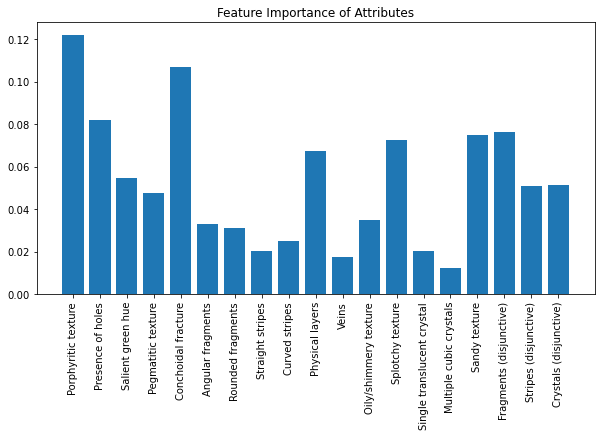

In [280]:
labels = [
    'Porphyritic texture',
    'Presence of holes',
    'Salient green hue',
    'Pegmatitic texture',
    'Conchoidal fracture',
    'Angular fragments',
    'Rounded fragments',
    'Straight stripes',
    'Curved stripes',
    'Physical layers',
    'Veins',
    'Oily/shimmery texture',
    'Splotchy texture',
    'Single translucent crystal',
    'Multiple cubic crystals',
    'Sandy texture',
    'Fragments (disjunctive)',
    'Stripes (disjunctive)',
    'Crystals (disjunctive)'
]
plt.figure(figsize=(10, 5))
plt.title('Feature Importance of Attributes')
plt.bar(labels, imparray)

# Rotate the labels vertically
plt.xticks(rotation='vertical')

plt.show()

- Here is the bar plot with the feature importance for identifying rock type.
- Some of the important features are Porphyritic texture, Presence of Holes,fragments(disjunctive),Conchoidal Fracture as seen on the bar plot

### Part-3 Combining our models into an ensemble

#### Hard Voting Classifier

In [198]:
# n_est 500 max_feat None max_depth 50 max_leaf_nodes 30 Tr_score 0.9507246376811594 Val_score 0.8160919540229885
from sklearn.ensemble import VotingClassifier
bestsoftmaxreg=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.1,max_iter=1000)
bestsvm=SVC(kernel="rbf",C=10)
bestrfc=RandomForestClassifier(n_estimators=500, max_features='log2', max_depth=100, max_leaf_nodes=20, n_jobs=-1)
voting_clf = VotingClassifier(
estimators=[('lr', bestsoftmaxreg), ('rf', bestrfc), ('svc', bestsvm)],
voting='hard')
voting_clf.fit(xtr, ytr.ravel())



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 multi_class='multinomial')),
                             ('rf',
                              RandomForestClassifier(max_depth=100,
                                                     max_features='log2',
                                                     max_leaf_nodes=20,
                                                     n_estimators=500,
                                                     n_jobs=-1)),
                             ('svc', SVC(C=10))])

##### Displaying the accuracy of our different models

In [199]:
from sklearn.metrics import accuracy_score
for clf in (bestsoftmaxreg, bestrfc, bestsvm, voting_clf):
    clf.fit(xtr, ytr)
    y_pred = clf.predict(xval)
    print(clf.__class__.__name__, accuracy_score(yval, y_pred))

LogisticRegression 0.7126436781609196
RandomForestClassifier 0.7816091954022989
SVC 0.7586206896551724
VotingClassifier 0.8160919540229885


- We can clearly see our Voting Classifier clearly outperforms the other models with an accuracy of 81% on our validaton sets. It is because it takes votes of different individual classifier before finally classifying the labels.

#### Soft Voting Classifier

In [202]:
from sklearn.ensemble import VotingClassifier
bestsoftmaxreg=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.1,max_iter=1000)
bestsvm=SVC(kernel="rbf",C=10,probability=True)
bestrfc=RandomForestClassifier(n_estimators=500, max_features='log2', max_depth=100, max_leaf_nodes=20, n_jobs=-1)
voting_clf = VotingClassifier(
estimators=[('lr', bestsoftmaxreg), ('rf', bestrfc), ('svc', bestsvm)],
voting='hard')
voting_clf.fit(xtr, ytr.ravel())

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 multi_class='multinomial')),
                             ('rf',
                              RandomForestClassifier(max_depth=100,
                                                     max_features='log2',
                                                     max_leaf_nodes=20,
                                                     n_estimators=500,
                                                     n_jobs=-1)),
                             ('svc', SVC(C=10, probability=True))])

In [204]:
from sklearn.metrics import accuracy_score
for clf in (bestsoftmaxreg, bestrfc, bestsvm, voting_clf):
    clf.fit(xtr, ytr)
    y_pred = clf.predict(xval)
    print(clf.__class__.__name__, accuracy_score(yval, y_pred))

LogisticRegression 0.7126436781609196
RandomForestClassifier 0.7701149425287356
SVC 0.7586206896551724
VotingClassifier 0.8275862068965517


- The soft voting classifier shows an accuray score of 0.83 on our validation set outperforming other classifiers with a little margin

#### Now using these best models to train it on our testing data

#### Logistic Regression

In [265]:
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score, precision_score
bestsoftmaxreg=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.1,max_iter=1000)
bestsoftmaxreg.fit(xtr,ytr)
ypred=bestsoftmaxreg.predict(x_test)
print("Accuracy of our chosen model",bestsvm.score(x_test,y_test))
print("Recall Score of our Test Data",recall_score(y_test,ypred,average='weighted'))
print("F1 score ",f1_score(y_test,ypred,average='weighted'))
print("Precision",precision_score(y_test, ypred, average=None))


Accuracy of our chosen model 0.7407407407407407
Recall Score of our Test Data 0.6851851851851852
F1 score  0.6815101226020764
Precision [0.675     0.72      0.6744186]


#### SVM Model

In [269]:
bestsvm=SVC(kernel="rbf",C=1)
bestsvm.fit(xtr,ytr)
ypred=bestsvm.predict(x_test)
print("Accuracy of our chosen model",bestsvm.score(x_test,y_test))
print("Recall Score of our Test Data",recall_score(y_test,ypred,average='weighted'))
print("F1 score ",f1_score(y_test,ypred,average='weighted'))
print("Precision",precision_score(y_test, ypred, average='weighted'))




Accuracy of our chosen model 0.7407407407407407
Recall Score of our Test Data 0.7407407407407407
F1 score  0.7364911049952332
Precision [0.75675676 0.76       0.7173913 ]


#### Random Forest Model

In [270]:
bestrfc=RandomForestClassifier(n_estimators=500, max_features='log2', max_depth=100, max_leaf_nodes=20, n_jobs=-1)#our chosen Random Forest model
bestrfc.fit(xtr,ytr)
ypred=bestrfc.predict(x_test)
print("Accuracy of our chosen model",bestrfc.score(x_test,y_test.ravel()))
print("Recall Score of our Test Data",recall_score(y_test,ypred,average=None))
print("F1 score ",f1_score(y_test,ypred,average=None))
print("Precision",precision_score(y_test, ypred, average=None))



Accuracy of our chosen model 0.7592592592592593
Recall Score of our Test Data [0.85294118 0.66666667 0.75609756]
F1 score  [0.81690141 0.72131148 0.73809524]
Precision [0.78378378 0.78571429 0.72093023]


### Voting Classifier

In [260]:
voting_clf.fit(xtr, ytr.ravel())
ypred=voting_clf.predict(x_test)
print("Accuracy of our chosen model",bestrfc.score(x_test,y_test.ravel()))
print("Recall Score of our Test Data",recall_score(y_test,ypred,average='weighted'))
print("F1 score ",f1_score(y_test,ypred,average='weighted'))
print("Precision",precision_score(y_test, ypred, average=None))





Accuracy of our chosen model 0.7592592592592593
Recall Score of our Test Data 0.7407407407407407
F1 score  0.7379760247348116
Precision [0.75675676 0.76923077 0.71111111]


####                                             Results 

| Model                  | Accuracy | Recall Score | F1 Score |Precision (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary)            |
|------------------------|----------|--------------|----------|----------------------|
| Logistic Regression    | 0.6852   | 0.6852       | 0.6803   | [0.675, 0.72, 0.674] |
| SVM Model              | 0.7407   | 0.7347       | 0.7342   | [0.7568, 0.76, 0.717] |
| Random Forest Model    | 0.7593   | 0.7586       | 0.7588   | [0.7838, 0.7857, 0.721] |
| Voting Classifier       | 0.7685   | 0.7367       | 0.7370   | [0.7568, 0.7692, 0.7111] |

         


- Considering the highest F1 score and relatively high recall and precision, the Random Forest Model and Voting Classifier seems to be performing the best overall among the models evaluated. 

#### References

- Aurlien Gron. 2017. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (1st. ed.). O'Reilly Media, Inc.


- https://scikit-learn.org/stable/